In [2]:
import nibabel as nib
import numpy as np
import cv2
import os, glob
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import load_model

model3 = load_model('/content/drive/My Drive/First_pve0_30.h5')
model4 = load_model('/content/drive/My Drive/First_pve1_30.h5')
model5 = load_model('/content/drive/My Drive/First_pve2_30.h5')


In [4]:
def normalizeImageIntensityRange(img):
    HOUNSFIELD_MIN = np.min(img)
    HOUNSFIELD_MAX = np.max(img)  
    HOUNSFIELD_RANGE = HOUNSFIELD_MAX - HOUNSFIELD_MIN                         
    img[img < HOUNSFIELD_MIN] = HOUNSFIELD_MIN
    img[img > HOUNSFIELD_MAX] = HOUNSFIELD_MAX
    return (img - HOUNSFIELD_MIN)/HOUNSFIELD_RANGE

In [1]:
def scaleImg(img, height, width):
    return cv2.resize(img, dsize=(width, height), interpolation=cv2.INTER_LINEAR)

In [10]:



def predict(targetImagePath, sliceIndex = 120):
  
  
  imgTargetNii = nib.load(targetImagePath)
  imgTarget = normalizeImageIntensityRange(imgTargetNii.get_fdata())
  imgSlice = imgTarget[sliceIndex,:,:]
  imgDimX, imgDimY = imgSlice.shape
  imgSliceScaled = scaleImg(imgSlice, 256, 256)

  imageInput = imgSliceScaled[np.newaxis,:,:,np.newaxis]
  maskPredict = model3.predict(imageInput)[0,:,:,0]
  maskPredict1 = model4.predict(imageInput)[0,:,:,0]
  maskPredict2 = model5.predict(imageInput)[0,:,:,0]
  imgDimX = 256
  imgDimY = 256

  maskPredictScaled = scaleImg(maskPredict, imgDimX, imgDimY)
  maskPredictScaled1 = scaleImg(maskPredict1, imgDimX, imgDimY)
  maskPredictScaled2 = scaleImg(maskPredict2, imgDimX, imgDimY)

  rgb = np.zeros((256,256,3))
  rgb[maskPredictScaled1>0.5] = (1,0,0)
  rgb[maskPredictScaled2>0.5] = (0,1,0)
  rgb[maskPredictScaled>0.5] = (0,0,1)

  plt.figure(figsize =(10,10))
  plt.subplot(1,2,1)
  plt.title("Input Image")
  plt.imshow(imgSliceScaled, cmap = 'gray')
  plt.subplot(1,2,2)
  plt.title("Predicted Mask")
  plt.imshow(rgb)



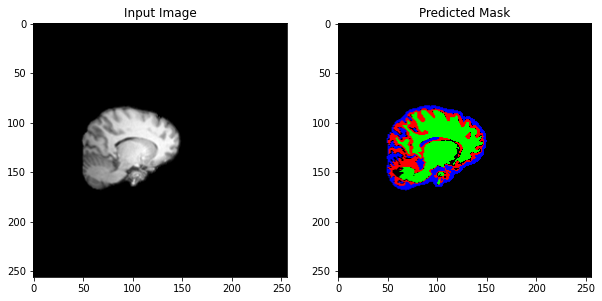

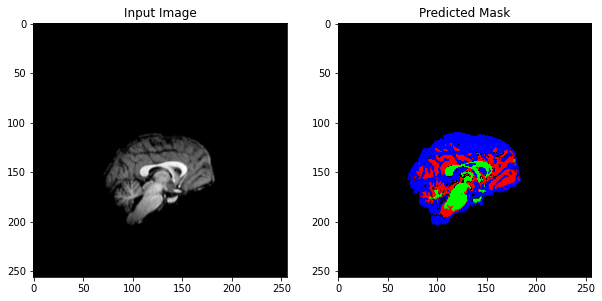

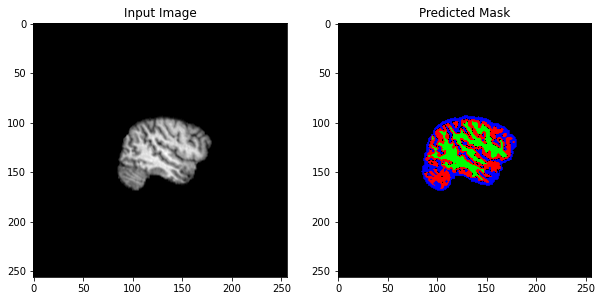

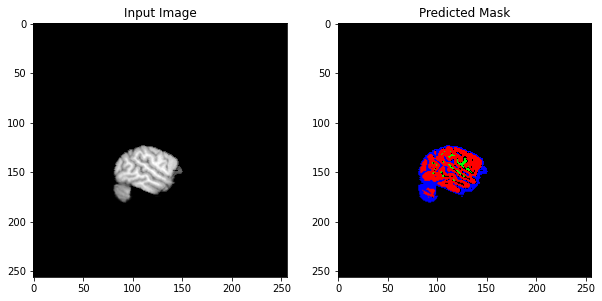

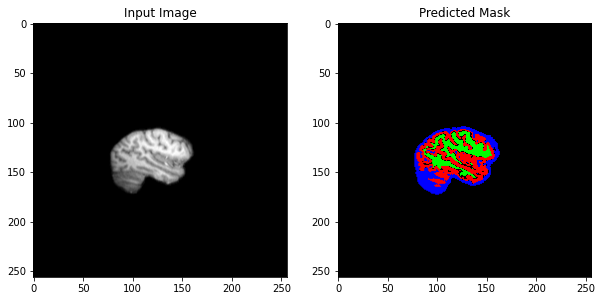

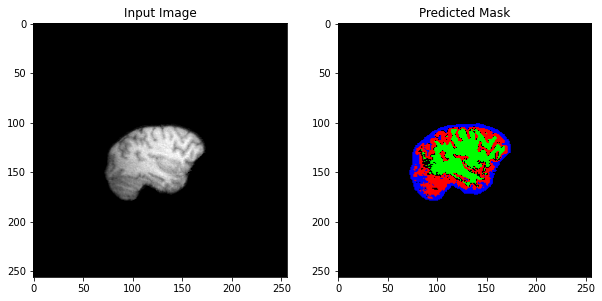

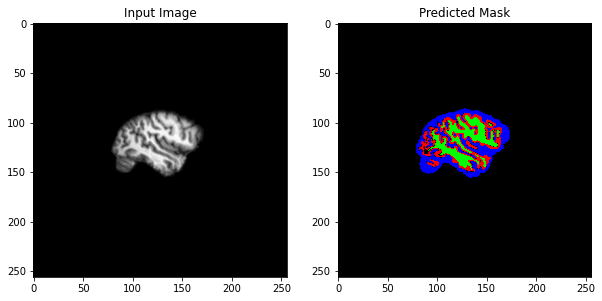

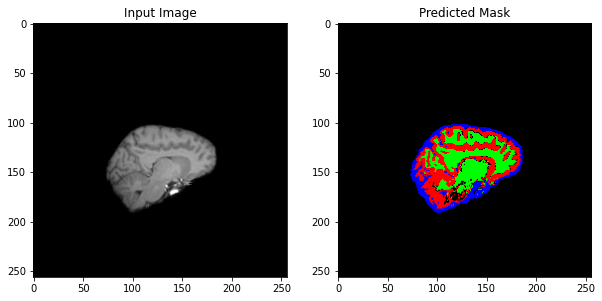

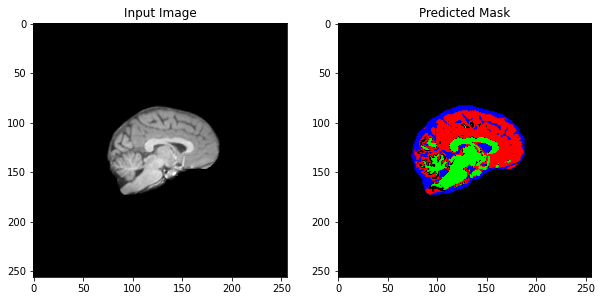

In [16]:
predict('/content/drive/My Drive/primates-anat/Chimp_David_Yerkes.nii.gz')
predict('/content/drive/My Drive/primates-anat/Chimp_Carl_Yerkes.nii.gz',130)
predict('/content/drive/My Drive/primates-anat/Chimp_Barney_Yerkes.nii.gz', 100)
predict('/content/drive/My Drive/primates-anat/Chimp_Barbara_Yerkes.nii.gz',92)
predict('/content/drive/My Drive/primates-anat/Chimp_Azalea_Yerkes.nii.gz',100)
predict('/content/drive/My Drive/primates-anat/Chimp_Arthur_Yerkes.nii.gz', 102)
predict('/content/drive/My Drive/primates-anat/Chimp_Artemus_Yerkes.nii.gz', 99)
predict('/content/drive/My Drive/primates-anat/Chimp_Abby_Yerkes.nii.gz',120)
predict('/content/drive/My Drive/primates-anat/Chimp_Amanda_Yerkes.nii.gz',125)
